In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Data

In [119]:
df = sns.load_dataset("mpg")
df.dropna(inplace=True)
df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


<Axes: xlabel='horsepower', ylabel='mpg'>

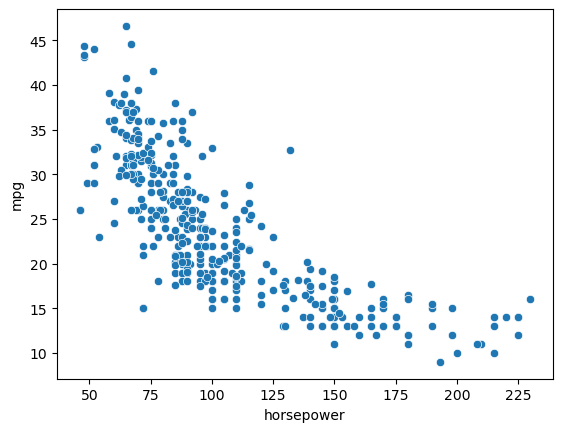

In [128]:
sns.scatterplot(df, y='mpg', x='horsepower')

1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant 

- Quelle est la corrélation de Pearson entre ces deux variables ?

- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?



In [ ]:
corr, p_value = sts.pearsonr(df['mpg'], df['horsepower'])
print(f"Corrélation des deux variable: {corr} et de p-valeur: {p_value}")

Corrélation des deux variable: -0.7784267838977774 et de p-valeur: 7.031989029396278e-81


2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la première moitié des années 70, et la seconde moitié des années 70 ?

<Axes: xlabel='half', ylabel='mpg'>

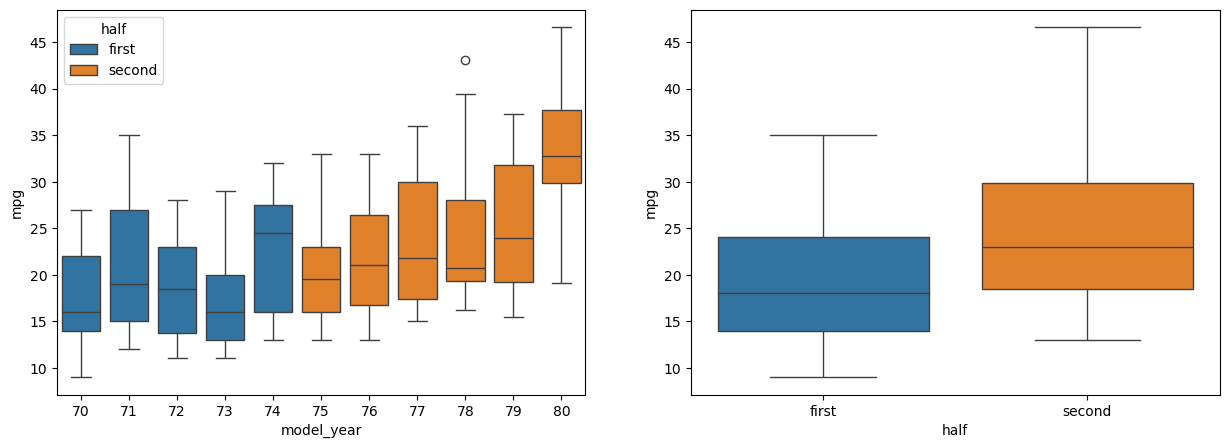

In [140]:
df1 = df.query("`model_year` <= 80 ").copy()
fig, ax = plt.subplots(1,2, figsize=(15,5))
df1["half"] = df1["model_year"].apply(lambda x: x<75).replace({True:'first', False :'second'})
sns.boxplot(df1, x='model_year', y='mpg', hue="half", ax=ax[0])
sns.boxplot(df1, x='half', y='mpg', hue="half", ax=ax[1])


<Axes: xlabel='model_year', ylabel='mpg'>

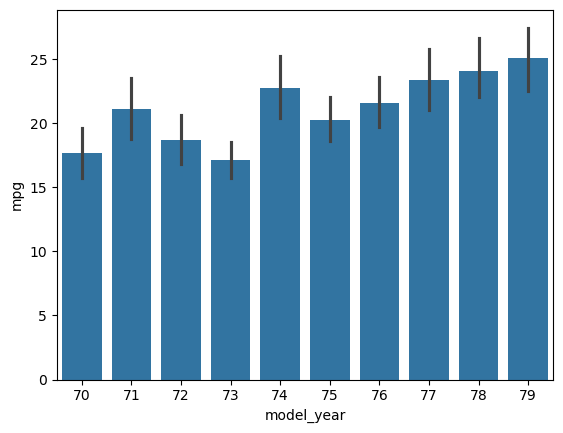

In [40]:
sns.barplot(df.query("`model_year` < 80 "), x='model_year', y='mpg')

Condition pour appliquer un test de student `ttest_ind`
- - Données normales ou plus de 30 points
- - Observations indépendantes
- - Variances similaires entre les deux groupes

- HO : "mpg moyen groupe A = mpg moyen groupe B"
  - groupe A = tout les modeles de 70-74
  - groupe B = tout les modeles de 75-80

In [160]:
groupe_A, groupe_B = df1.groupby('half')['mpg'].apply(list)

In [164]:

seuil = 0.02
correlation, p_value = sts.ttest_ind(groupe_A, groupe_B, equal_var = True)

print("HO: <<  Les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne "
      "mpg  augmenter entre la première moitié des années 70, et la seconde moitié des années 70  >>"  )
print(f"Valeur p obtenue : {p_value}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rjeter 'HO'")  


HO: <<  Les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne mpg  augmenter entre la première moitié des années 70, et la seconde moitié des années 70  >>
Valeur p obtenue : 2.4451466260288248e-11
Nous avons suffisamment d'argument pour rejeter 'HO'


2. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. 
- Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



In [166]:
df.query("`origin` == 'usa' & `cylinders` == 4 | `cylinders` == 6 ").groupby('cylinders')['acceleration'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
4,69.0,16.465217,2.180989,11.6,14.90,16.2,17.7,22.2
6,83.0,16.254217,2.031778,11.3,15.05,16.0,17.6,21.0


In [183]:
groupe_A, groupe_B = df.query("`origin` == 'usa' & `model_year` <= 80 & (`cylinders` == 4 | `cylinders` == 6) ").groupby('cylinders')['acceleration'].apply(list)

In [184]:

seuil = 0.02

correlation,p_value = sts.ttest_ind(groupe_B, groupe_A, equal_var=True)
print("HO: << les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. >>"  )
print(f"Valeur p obtenue : {p_value}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rjeter 'HO'")  
    

HO: << les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. >>
Valeur p obtenue : 0.9650325251684159
Nous n'avons pas suffisamment d'évidence pour rjeter 'HO'


## 4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.

In [100]:
df_cylinders = df.query("(`cylinders` == 4 | `cylinders` == 6 | `cylinders` == 8) & name.str.startswith ('ford')" )

# frequence observer
freq_obs = df_cylinders['cylinders'].value_counts(normalize=False, sort=False).sort_index().values
freq_obs

array([16, 12, 20], dtype=int64)

In [ ]:
# frequence experimentale
freq_exp = np.array([0.25,0.25,0.50])
freq_exp = freq_exp*len(df_cylinders)


array([12., 12., 24.])

In [199]:
p_value = sts.chisquare(f_obs=freq_obs, f_exp=freq_exp).pvalue
print(f"HO: << il y avait :\n - 25 % de 4 cylindres\n - 25 % de 6 cylindres \n - 50 % de 8 cylindres >>"  )
print(f"\nValeur p obtenue : {p_value:.5f}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print(f"Nous n'avons pas suffisamment d'évidence pour rejeter 'HO' au seuil {seuil}")  

HO: << il y avait :
 - 25 % de 4 cylindres
 - 25 % de 6 cylindres 
 - 50 % de 8 cylindres >>

Valeur p obtenue : 0.36788
Nous n'avons pas suffisamment d'évidence pour rejeter 'HO' au seuil 0.02


5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [192]:
df.query("`cylinders` == 4").groupby('origin')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,61.0,28.106557,6.291075,18.0,24.0,27.0,30.0,44.3
japan,69.0,31.595652,5.435787,20.0,27.5,32.0,35.0,46.6
usa,69.0,28.013043,4.566596,19.0,25.0,27.2,30.9,39.0


In [201]:
p_value= sts.f_oneway(*df.query("`cylinders` == 4").groupby('origin')['mpg'].apply(list)).pvalue

print(f"HO: << Les voitures à 4 cylindres ont en moyenne la même consommation \n"
      "  d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982 >>"  )
print(f"\nValeur p obtenue : {p_value:.5f}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rejeter 'HO'")  

HO: << Les voitures à 4 cylindres ont en moyenne la même consommation 
  d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982 >>

Valeur p obtenue : 0.00011
Nous avons suffisamment d'argument pour rejeter 'HO'


## 6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. 
Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



In [193]:
df.groupby('origin')['horsepower'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,68.0,80.558824,20.157871,46.0,69.75,76.5,90.0,133.0
japan,79.0,79.835443,17.819199,52.0,67.00,75.0,95.0,132.0
usa,245.0,119.048980,39.897790,52.0,88.00,105.0,150.0,230.0


In [196]:
europe, japan = df.query("`origin` == 'europe' | `origin` == 'japan'").groupby('origin')['horsepower'].apply(list)

In [198]:
p_value= sts.ttest_ind(europe, japan, equal_var=True).pvalue

print(f"HO: << Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux >>"  )
print(f"\nValeur p obtenue : {p_value:.5f}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rejeter 'HO'")  

HO: << Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux >>

Valeur p obtenue : 0.81769
Nous n'avons pas suffisamment d'évidence pour rejeter 'HO'


### 7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



Pour cette question aidez-vous du code suivant :

In [222]:
dodge_ford = df.query(" name.str.contains('ford|dodge', case=False, na=False)").copy()
dodge_ford['brand'] = dodge_ford['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge' )
pd.crosstab(dodge_ford['brand'], dodge_ford['cylinders'])

cylinders,4,6,8
brand,,,
dodge,12,4,12
ford,16,12,20


In [223]:
sts.chi2_contingency(pd.crosstab(dodge_ford['brand'], dodge_ford['cylinders']))

Chi2ContingencyResult(statistic=1.4056122448979598, pvalue=0.49519377793169383, dof=2, expected_freq=array([[10.31578947,  5.89473684, 11.78947368],
       [17.68421053, 10.10526316, 20.21052632]]))